# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [26]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [27]:
#Your code here
new_cols = [x.lower() for x in df.columns]
df.columns = new_cols
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [28]:
#Your code here
df.set_index('linename').head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [29]:
# Your code here
df.reset_index().head()

,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [30]:
# Your code here
df['num_lines'] = df.linename.map(lambda x: len(x))

In [31]:
df['num_lines'].value_counts()

1     84876
2     42074
3     26965
5     13632
4      9067
8      7701
7      4028
12     3936
6      2966
9      2011
11      369
Name: num_lines, dtype: int64

## Write a function to clean a column name

In [32]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [33]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [34]:
# Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [43]:
# Your code here
df.date = pd.to_datetime(df.date)

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
c/a          197625 non-null object
unit         197625 non-null object
scp          197625 non-null object
station      197625 non-null object
linename     197625 non-null object
division     197625 non-null object
date         197625 non-null datetime64[ns]
time         197625 non-null object
desc         197625 non-null object
entries      197625 non-null int64
exits        197625 non-null int64
num_lines    197625 non-null int64
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 18.1+ MB


In [46]:
#Your code here
df['days'] = df.date.dt.dayofweek

In [48]:
df.days

0         5
1         5
2         5
3         5
4         5
5         5
6         6
7         6
8         6
9         6
10        6
11        6
12        0
13        0
14        0
15        0
16        0
17        0
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
197595    0
197596    0
197597    0
197598    0
197599    0
197600    0
197601    1
197602    1
197603    1
197604    1
197605    1
197606    1
197607    2
197608    2
197609    2
197610    2
197611    2
197612    2
197613    3
197614    3
197615    3
197616    3
197617    3
197618    3
197619    4
197620    4
197621    4
197622    4
197623    4
197624    4
Name: date, Length: 197625, dtype: int64

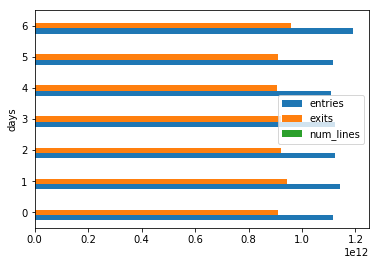

In [50]:
grouped = df.groupby('days').sum()
grouped.plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [58]:
grouped.reset_index(inplace=True)


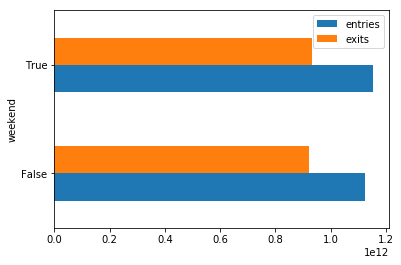

In [60]:
grouped['weekend'] = grouped.days.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('weekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')# Your answer here 

## Drop a couple of columns

In [61]:
# Your code here
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'days'],
      dtype='object')

In [62]:
df.drop(['unit', 'scp'], axis=1, inplace=True)

In [63]:
df

,c/a,station,linename,division,date,time,desc,entries,exits,num_lines,days
0,A002,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,A002,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
2,A002,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5
3,A002,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5
4,A002,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5
5,A002,59 ST,NQR456W,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,5
6,A002,59 ST,NQR456W,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,6
7,A002,59 ST,NQR456W,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,6
8,A002,59 ST,NQR456W,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,6
9,A002,59 ST,NQR456W,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,6


## Summary

Great! You practiced your data cleanup-skills using Pandas.

In [64]:
# Done